In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")
from statistics import mean
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2
from sklearn.preprocessing import OneHotEncoder

In [2]:
heart_df = pd.read_csv("heart.csv")

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
heart_df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [6]:
binned = []
for i in heart_df['age']:
    if i<=40: x = 'below40'
    elif 40<i<=55: x = 'middle'
    elif i>55: x = 'old'
    binned.append(x)
heart_df['age_bins'] = binned

In [7]:
heart_df['age_bins'].value_counts()

old        151
middle     133
below40     19
Name: age_bins, dtype: int64

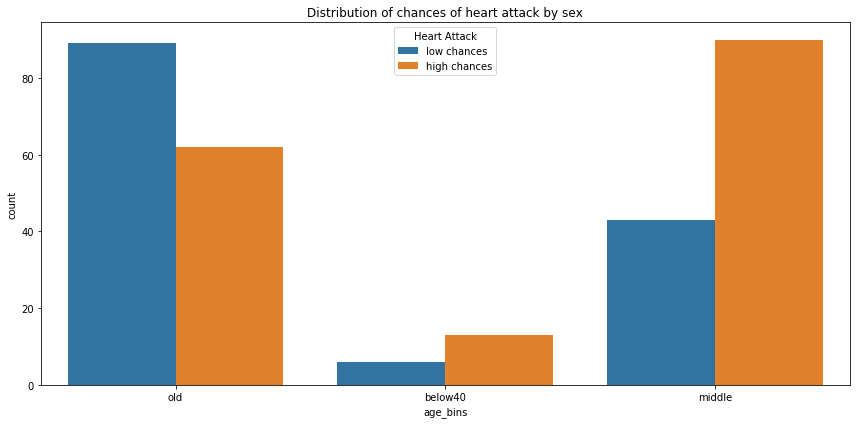

In [8]:
fig, axes = plt.subplots(figsize=(12,6))
sns.countplot(data=heart_df, x='age_bins', hue='target')
plt.title("Distribution of chances of heart attack by sex")
plt.legend(labels = ['low chances','high chances'], title = 'Heart Attack')
plt.tight_layout()

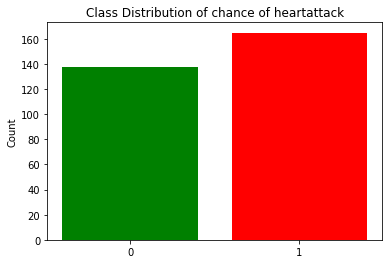

In [9]:
plt.bar(x = heart_df['target'].value_counts().index, height = heart_df['target'].value_counts(), color = ['red','green'])
plt.title('Class Distribution of chance of heartattack')
plt.xlabel('')
plt.xticks([0,1])
plt.ylabel('Count')
plt.show()

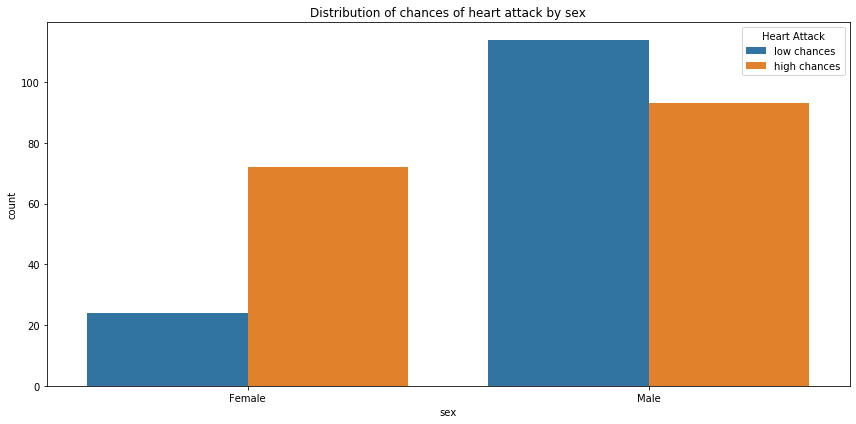

In [10]:
fig, axes = plt.subplots(figsize=(12,6))
sns.countplot(data=heart_df, x='sex', hue='target')
plt.title("Distribution of chances of heart attack by sex")
plt.legend(labels = ['low chances','high chances'], title = 'Heart Attack')
axes.set_xticklabels(labels = ['Female','Male'])
plt.tight_layout()

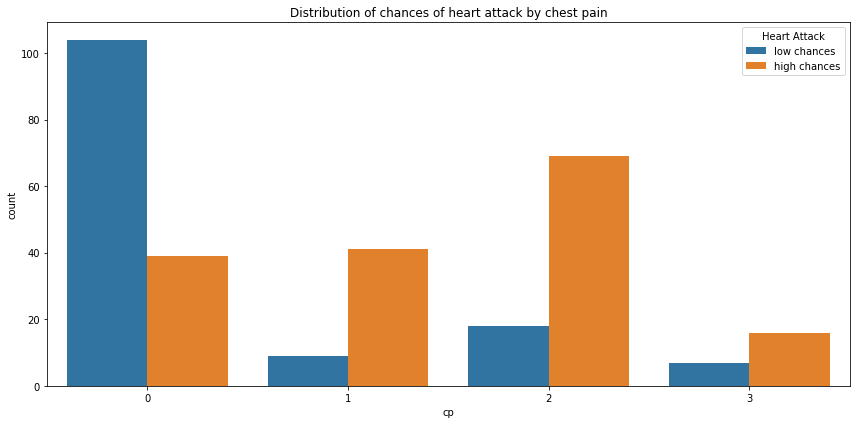

In [11]:
fig, axes = plt.subplots(figsize=(12,6))
sns.countplot(data=heart_df, x='cp', hue='target')
plt.title("Distribution of chances of heart attack by chest pain")
plt.legend(labels = ['low chances','high chances'], title = 'Heart Attack')
plt.tight_layout()

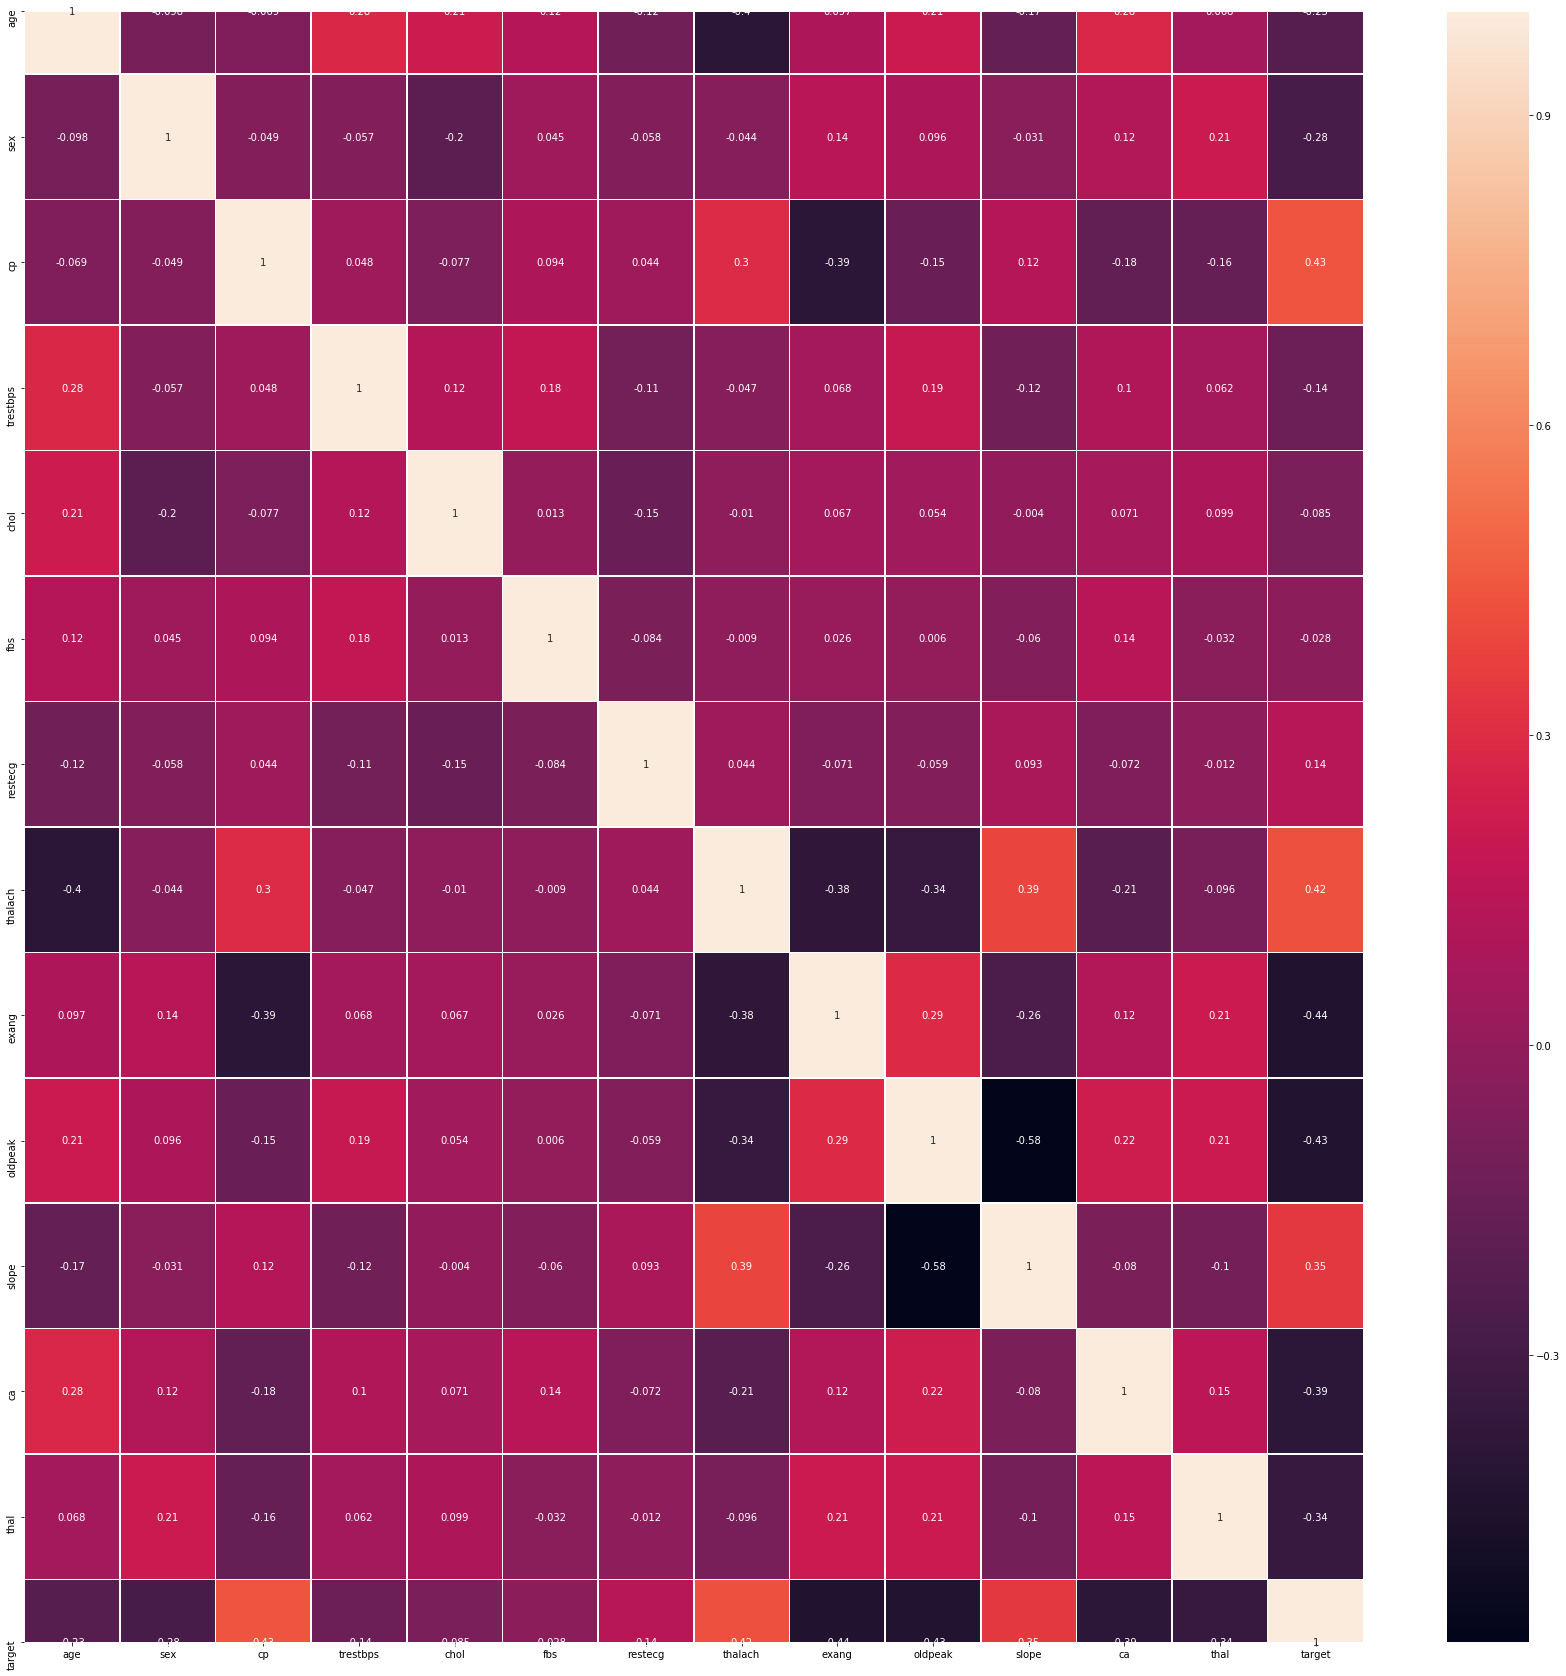

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(round(heart_df.corr(), 3), linewidth = 0.5, annot= True)

In [13]:
#dummies_df = pd.get_dummies(heart_df['age_bins'],prefix = 'age_')
#heart_data = heart_df.drop(['age_bins', 'age'], axis = 1)
#heart_data = pd.concat([heart_data, dummies_df], axis = 1)

In [14]:
#heart_data.head()

In [15]:
heart_data = heart_df.drop(['age_bins'], axis = 1)

In [16]:
X = heart_data.drop(['target'], axis = 1)
Y = heart_data['target']

In [17]:
def model(X,Y,clf, clf_name, f_i = True, lo_re = False):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3, stratify = Y, random_state = 555)
    
    clfit     = clf.fit(X_train, Y_train)
    predicted = clfit.predict(X_test)
    
    accuracy  = round(accuracy_score(Y_test, predicted),4)*100
    con_mat   = confusion_matrix(Y_test, predicted)
    
    print(clf_name + ":\n\n" + "Accuracy Score : " + str(accuracy) + "%")
    print("\nConfusion Matrix : \n" + str(con_mat))
    
    if f_i:
        importance  = clfit.feature_importances_
    elif lo_re :
        importance = clfit.coef_.flatten()
        
    sort_index = np.argsort(importance)
    plt.figure(figsize=(6,6))
    plt.title('Coefficients Of ' + clf_name)
    plt.barh(range(len(importance)), importance[sort_index], align='center')
    plt.yticks(np.arange(len(X_train.columns)), X_train.columns[sort_index])
    
    plot_confusion_matrix(clf, X_test, Y_test, normalize= 'true')
    plt.title("Confusion Matrix")
    
    plt.tight_layout()
    plt.show()

Logistic Regression:

Accuracy Score : 80.22%

Confusion Matrix : 
[[32  9]
 [ 9 41]]


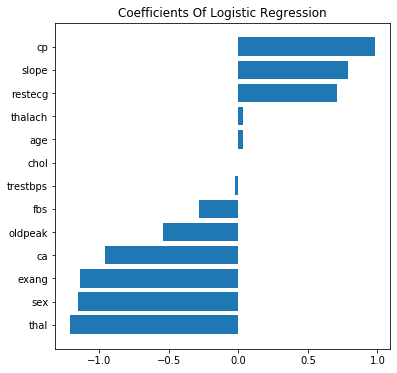

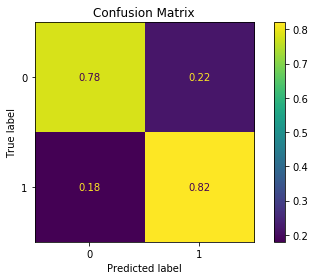

In [18]:
model(X,Y,LogisticRegression(),'Logistic Regression',f_i = False, lo_re = True)

Decision Tree:

Accuracy Score : 78.02%

Confusion Matrix : 
[[30 11]
 [ 9 41]]


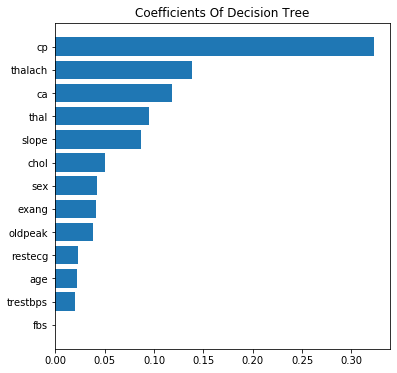

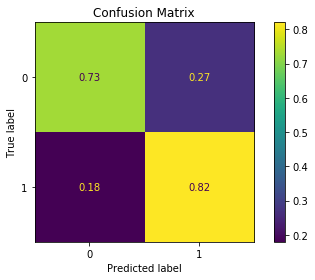

In [19]:
model(X,Y,DecisionTreeClassifier(),'Decision Tree')

Random Forest:

Accuracy Score : 79.12%

Confusion Matrix : 
[[30 11]
 [ 8 42]]


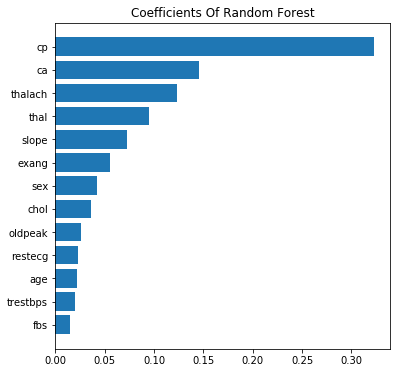

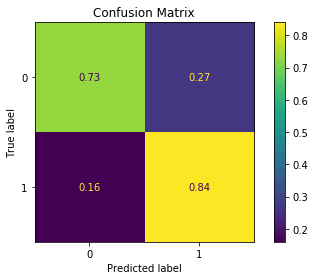

In [20]:
model(X,Y,DecisionTreeClassifier(),'Random Forest')

Gradient Boost:

Accuracy Score : 81.32000000000001%

Confusion Matrix : 
[[31 10]
 [ 7 43]]


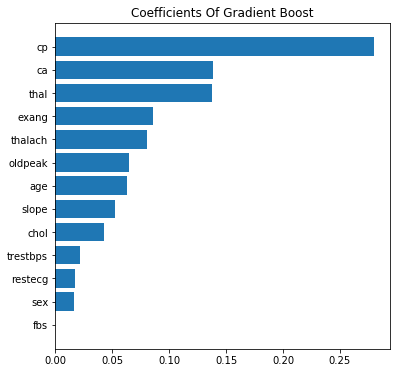

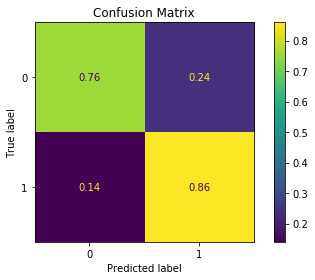

In [21]:
model(X,Y,GradientBoostingClassifier(),'Gradient Boost')

Ada Boost:

Accuracy Score : 83.52000000000001%

Confusion Matrix : 
[[34  7]
 [ 8 42]]


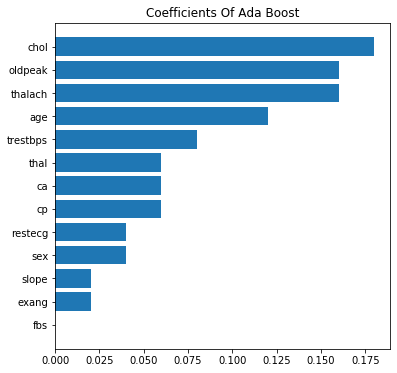

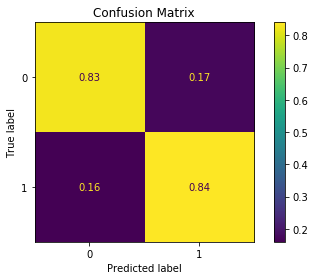

In [22]:
model(X,Y,AdaBoostClassifier(),'Ada Boost')

In [23]:
def CV(X,Y, clf, clf_name, n_splits = 5):
    
    print(clf_name)
    
    c_v = StratifiedKFold(n_splits= n_splits, random_state=555)
    data = pd.concat([Y,X], axis=1)
    accuracy = []
    sensitivity = []
    specificity = []
    auc_score = []

    for train_split, test_split in c_v.split(X,Y):
    
        train_set = data.iloc[train_split]
        test_set = data.iloc[test_split]
    
        clf.fit(train_set.iloc[:, 1:], train_set.iloc[:, 0])
        pred_val = clf.predict(test_set.iloc[:, 1: ])
    
        tp, fp, fn, tn = confusion_matrix(test_set.iloc[:, 0], pred_val).ravel()
        specificity.append(tn / (fp + tn))
        accuracy.append((tp + tn ) / (tp + fp + fn + tn))
        sensitivity.append((tp) / (tp + fn))

    print('Mean Accuracy', mean(accuracy) * 100)
    print('Mean Specificity', mean(specificity) * 100)
    print('Mean Sensitivity:', mean(sensitivity) * 100)
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1, n_splits + 1), accuracy)
    plt.plot(range(1, n_splits + 1), specificity)
    plt.plot(range(1, n_splits + 1), sensitivity)
    plt.xticks(range(1, 6))
    plt.xlabel('Splits')
    plt.ylabel('Score')
    plt.title("CV - Metrics")
    plt.legend(labels = ['accuracy', 'specificity', 'sensitivity'], loc = 'lower right')
    plt.show()

Logistic Regression
Mean Accuracy 82.48633879781421
Mean Specificity 81.98424191408313
Mean Sensitivity: 83.8950080515298


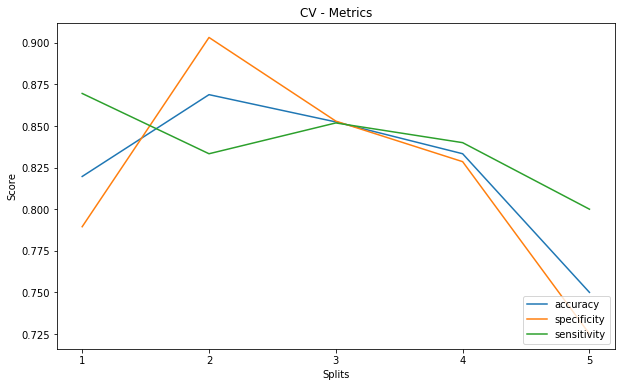

In [24]:
CV(X,Y,LogisticRegression(),"Logistic Regression")

Decision Tree
Mean Accuracy 76.21311475409836
Mean Specificity 78.57743824802648
Mean Sensitivity: 75.0


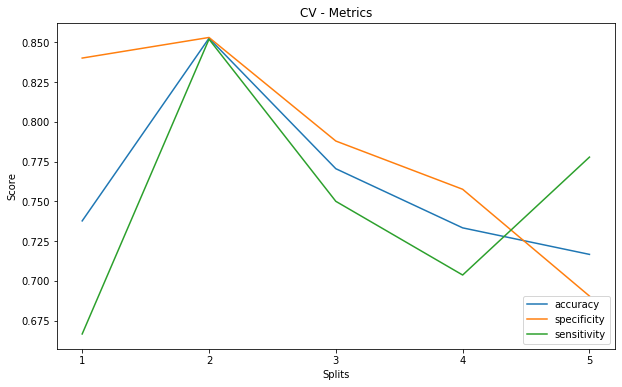

In [25]:
CV(X,Y,DecisionTreeClassifier(),"Decision Tree")

Random Forest
Mean Accuracy 81.82513661202185
Mean Specificity 83.52544668121918
Mean Sensitivity: 80.39424016843371


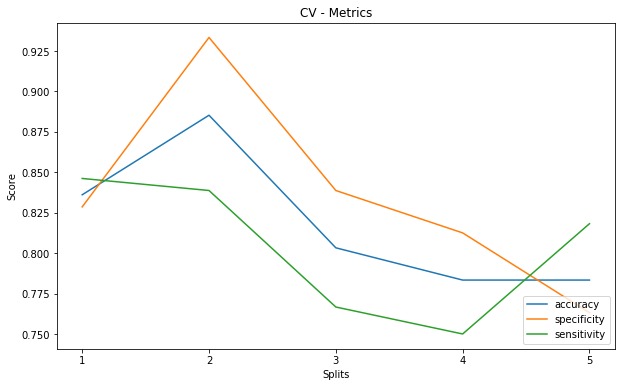

In [26]:
CV(X,Y,RandomForestClassifier(),"Random Forest")

Gradient Boost
Mean Accuracy 81.16393442622952
Mean Specificity 80.99473876893232
Mean Sensitivity: 82.17619047619048


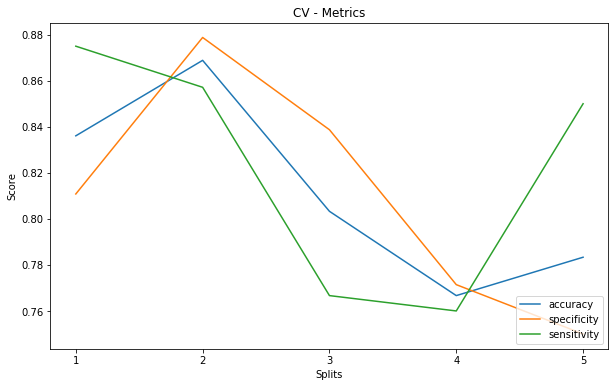

In [27]:
CV(X,Y,GradientBoostingClassifier(),"Gradient Boost")

Ada Boost
Mean Accuracy 78.51366120218579
Mean Specificity 79.20356895356896
Mean Sensitivity: 78.2769886945928


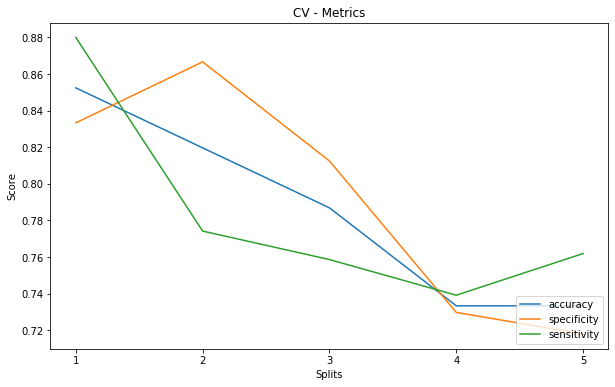

In [28]:
CV(X,Y,AdaBoostClassifier(),"Ada Boost")

In [29]:
accuracy_SKB = []
para_SKB = []
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 555) 
for c in range(5, 14):
    chi_SKB = SelectKBest(chi2, k=c)
    hotel_data_chi_SKB = chi_SKB.fit_transform(x_train, y_train)
    true_false_SKB = chi_SKB.get_support()
    indices_SKB = []
    for i, j in enumerate(true_false_SKB):
        if j:
            indices_SKB.append(i)
    
    para = list(x_train.columns[indices_SKB])
    para_SKB.append(para)
    model_LR = LogisticRegression()
    model_LR.fit(hotel_data_chi_SKB, y_train)
    x_test_SKB = x_test.iloc[:, indices_SKB]
    pre = model_LR.predict(x_test_SKB)
    acc = accuracy_score(y_test, pre)
    accuracy_SKB.append(acc)
    index = list(np.arange(5,15,1))
SKB = pd.DataFrame(list(zip(index, para_SKB, accuracy_SKB)),
              columns=['K','parameters', 'accuracy'])

In [30]:
SKB

,K,parameters,accuracy
0,5,"[cp, chol, thalach, oldpeak, ca]",0.791209
1,6,"[cp, chol, thalach, exang, oldpeak, ca]",0.780220
2,7,"[age, cp, chol, thalach, exang, oldpeak, ca]",0.769231
3,8,"[age, cp, trestbps, chol, thalach, exang, oldp...",0.791209
4,9,"[age, cp, trestbps, chol, thalach, exang, oldp...",0.769231
5,10,"[age, sex, cp, trestbps, chol, thalach, exang,...",0.835165
6,11,"[age, sex, cp, trestbps, chol, thalach, exang,...",0.835165
7,12,"[age, sex, cp, trestbps, chol, restecg, thalac...",0.835165
8,13,"[age, sex, cp, trestbps, chol, fbs, restecg, t...",0.835165


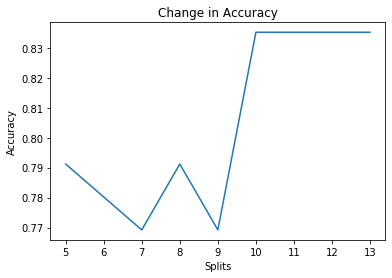

In [31]:
plt.plot(SKB['K'], SKB['accuracy'])
plt.xticks(SKB['K'])
plt.title("Change in Accuracy")
plt.xlabel("Splits")
plt.ylabel("Accuracy")
plt.show()

In [32]:
accuracy_RFE = []
para_RFE = []
for i in range(5, 13):    
    rfe = RFE(LogisticRegression(), n_features_to_select = i)
    rfe = rfe.fit(x_train, y_train)
    pred = rfe.predict(x_test)
    accuracy_RFE.append(accuracy_score(y_test, pred))
    true_false_RFE = rfe.support_
    k = []
    for x, y in enumerate(true_false_RFE):
        if y:
            k.append(x)
    para = list(x_train.columns[k])
    para_RFE.append(para)
index = list(np.arange(5,13,1))
RFE_df = pd.DataFrame(list(zip(index, para_RFE, accuracy_RFE)),
              columns=['K','parameters', 'accuracy'])

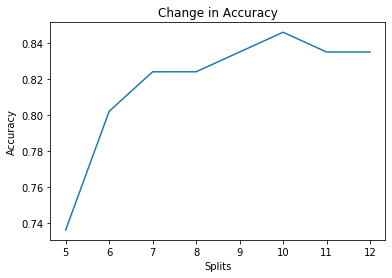

In [33]:
plt.plot(RFE_df['K'], RFE_df['accuracy'])
plt.xticks(RFE_df['K'])
plt.title("Change in Accuracy")
plt.xlabel("Splits")
plt.ylabel("Accuracy")
plt.show()

In [34]:
RFE_df

,K,parameters,accuracy
0,5,"[sex, exang, slope, ca, thal]",0.736264
1,6,"[sex, cp, exang, slope, ca, thal]",0.802198
2,7,"[sex, cp, exang, oldpeak, slope, ca, thal]",0.824176
3,8,"[sex, cp, fbs, exang, oldpeak, slope, ca, thal]",0.824176
4,9,"[sex, cp, fbs, restecg, exang, oldpeak, slope,...",0.835165
5,10,"[sex, cp, fbs, restecg, thalach, exang, oldpea...",0.846154
6,11,"[sex, cp, trestbps, fbs, restecg, thalach, exa...",0.835165
7,12,"[sex, cp, trestbps, chol, fbs, restecg, thalac...",0.835165


In [38]:
SKB[SKB['K'] == 10]['parameters'].tolist()

[['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca']]

In [39]:
RFE_df[RFE_df['K'] == 10]['parameters'].tolist()

[['sex',
  'cp',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']]